Ejercicio 3:Distribucion de Fisher Tippett.

Utilizando la distribucion de fisher-tippet $(1/\sigma)*t(x)(\xi+1)*\exp(-t(x))$, donde $\xi=0$, nos queda $t(x)=\exp(-(x-\mu)/\sigma), $\mu=0$,$\lambda$=1/$\sigma$=1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install scipy
import scipy.stats as sp


In [2]:
def t(x,lam=1): #Defino la funcion t para luego llamarla a la funcion de Fisher-Tippet
    t=np.exp(-x*lam) #defino la funcion mu lo tomo 0 por teorico, lambda es uno
    return(t) #Me va a devolver la funcion t.

In [3]:
def pdf(x,lam=1): #A continuacion defino la distribucion.
    p=lam*t(x)*np.exp(-t(x))
    return(p)

In [4]:
pdf(-1)

np.float64(0.1793740787340172)

In [5]:
#Ahora calculo la funcion acumulada de la distribucion p
#Integro inicialmente la funcion p  
def cdf(x,lam=1):
    c=lam*np.exp(-t(x)) #Integral entre [-infinito,a]
    return(c)
    


In [6]:
cdf(5) #Hago esto solo para ver si funciona

np.float64(0.9932847020678415)

In [7]:
def inv_cdf(y,lam=1): #Defino la inversa de la funcion acumulada
    inv=(-1/lam)*np.log(-np.log(y/lam))
    return(inv)

    
    

In [8]:
inv_cdf(0.9932847020678415)

np.float64(4.999999999999997)

Ahora, a la funcion inversa le aplico un generador de numeros aleatoreos con distribucion uniforme y de esta manera me va a devolver los valores de x de la distribucion de Fisher-Tippet entre [0;1]

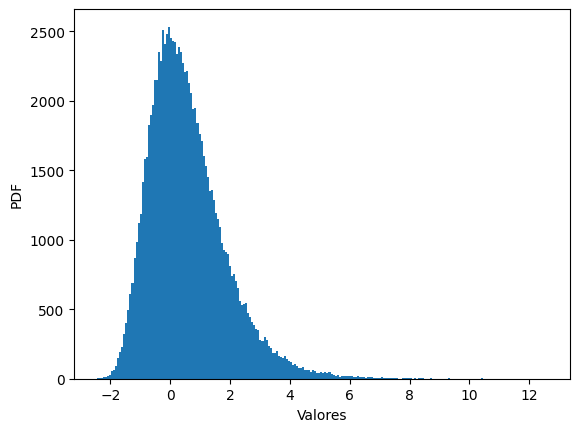

In [9]:
y=np.random.random(100000) #Aqui me esta tomando los valores aleatoreos del generador
g=inv_cdf(y) #Le aplico a mi funcion el generador de numeros aleatoreos
plt.hist(g,bins='auto')
plt.xlabel('Valores')
plt.ylabel('PDF')
plt.show()

In [10]:
np.mean(g)

np.float64(0.578290217755839)

Comparamos el valor medio de la muestra que obtuvimos, con el valor teorico $E(\lambda)$

In [11]:
def E(lam=1):
    j=0.57721/lam
    return(j)

In [12]:
k=np.mean(g)-E() #Diferencia entre el valor teorico y el calculado
k

np.float64(0.001080217755838997)

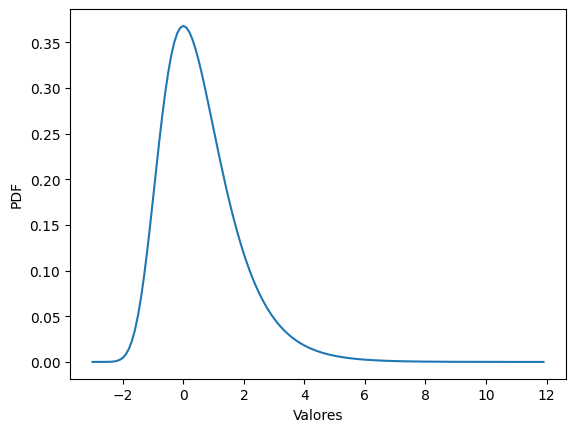

In [13]:
x=np.arange(-3,12,0.1) #Aqui me esta tomando los valores aleatoreos del generador
h=(pdf(x)) #Le aplico a mi funcion el generador de numeros aleatoreos
plt.plot(x,h)
plt.xlabel('Valores')
plt.ylabel('PDF')
plt.show()

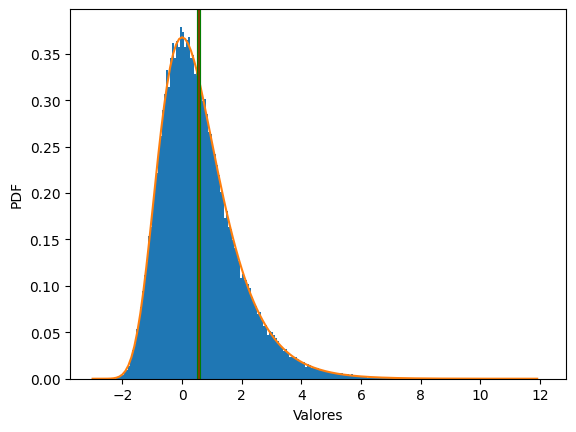

In [14]:
y=np.random.random(100000) #Aqui me esta tomando los valores aleatoreos del generador
g=inv_cdf(y) #Le aplico a mi funcion el generador de numeros aleatoreos
plt.hist(g,bins='auto',density=True)
plt.xlabel('Valores')
plt.ylabel('PDF')


x=np.arange(-3,12,0.1) #Aqui me esta tomando los valores aleatoreos del generador
h=(pdf(x)) #Le aplico a mi funcion el generador de numeros aleatoreos
plt.plot(x,h)
plt.xlabel('Valores')
plt.ylabel('PDF')

mean_empirica=np.mean(g)
plt.axvline(mean_empirica,color='green',lw=3)
mean_teorico=E()
plt.axvline(mean_teorico,color='red',alpha=0.5)
plt.savefig('fisher-tippet.pdf', dpi=300, bbox_inches='tight')



4. M ́etodo de la transformada inversa: distribuci ́on de Poisson.
Funcion densidad de probabilidad $f(x)=\lambda \exp(-\lambda*x)$. Utilizamos esta relacion para asignarle una probabilidad a un evento, de este tipo.
Queremos que los eventos tengan una distribucion de Poisson.
Para esto quiero ver el intervalo de tiempo, cada cuanto se va a dar el siguinte evento, donde la suma de todos los eventos sean 3hs.
Para esto calculo la probabilidad acumulada y la invierto 
 $T(t)=\int_{0}^{t} f(t') dt' = 1-\exp(-\lambda*t)$ -----> probabilidad acumulada
 
Ahora la invertimos:
 $F^(-1) = - \ln(1-x)/\lambda$
 


In [15]:
def pdf(t,lam=1):
    p=lam*np.exp(-lam*t)
    return(p)

def cdf(t,lam=1):
    p=(1.0-np.exp(-lam*t))
    return(p)

def inv_cdf(x,lam=1):
    p=-np.log(1-x)/lam
    return(p)

(0.0, 7.0)

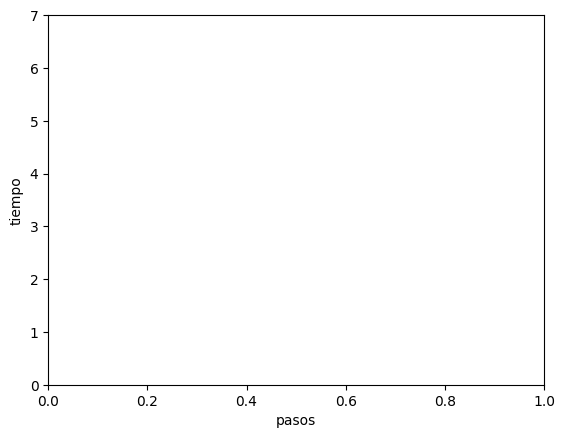

In [16]:
lam=5
Nbin=100
Nexp=20000
cuenta=np.zeros(Nexp)
for i in range(Nexp):
    t=np.random.rand(Nbin)
    t=inv_cdf(t,lam=lam)
    t=np.append(0,t)
   #print(t)
    t=t.cumsum()
    j, =np.where(t>3.0)
    cuenta[i]=j[0]-1
#    plt.plot(np.arange(Nbin+1),t,lw=3,alpha=1.0)
plt.xlabel('pasos')
plt.ylabel('tiempo')
plt.ylim(0,7)

In [17]:
#Ahora quiero ver la distribucion de poisson
cuenta


array([16., 10., 11., ..., 21., 14., 11.])

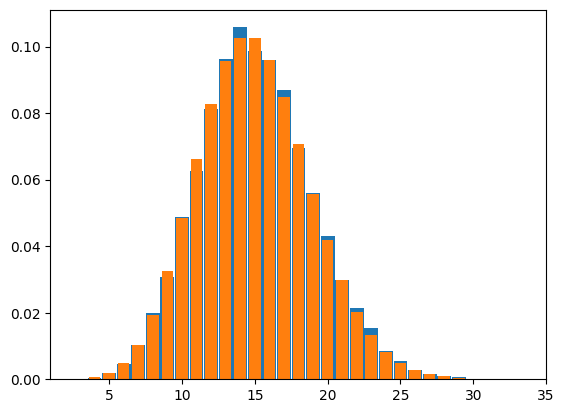

In [18]:

x,y=np.unique(cuenta,return_counts=True)
plt.bar(x,y/np.sum(y),width=0.95)
p=sp.poisson(mu=15.0)
plt.bar(x,p.pmf(x))
plt.savefig('Distribucion-poisson.pdf', dpi=300, bbox_inches='tight')

plt.show()


Experimento del Bufon:
a. $ x \in [0;t]$
$ \theta \in [-\pi/2;\pi/2]
$ p(x)=1/t$
$p(\theta)=1/\pi$
Dado que x y theta son variables independientes
Entonces calculo $\int_{0}^{t} \int_{0}^{\pi}(p(x)*p(\theta)) dxd\theta$
Entonces la funcion de probabilidad me da $f(x,\theta)= 1/t*\pi$

b. probabilidad de que toque una de las lineas
Tomo la proyeccion y condicion que $x<l/2*sen(\theta)$
y tomo otra condicio $x>t+l/2*sen(\theta)$

$ P(x,\theta)= (1/t*pi)\int_{-\pi/2}^{0} \int_{0}^{-l/2*sen(\theta)} dxd\theta+(1/t*pi)\int_{0}^{\pi/2} \int_{0}^{l/2*sen(\theta)} dxd\theta=l/t*\pi $
Si tomo los casos de que pueda tocar la barra de arriba me sale la probabilidad es $P(X,\theta)=2*l/t*\pi$

In [19]:
#N=1000000 #numero de agujas
t=1
l=0.5
#x=np.random.uniform(0,t,N)
#theta=np.random.uniform(-np.pi/2,np.pi/2,N)
#print(x)
#print(theta)
#contador=0
Ns=np.logspace(1,7,10,dtype=int) 
error=np.zeros(10)
for j,N in enumerate(Ns):
    contador=0
    for i in range(N):
        x=np.random.uniform(0,t,1)[0]
        theta=np.random.uniform(-np.pi/2,np.pi/2,1)[0]
        if theta>=0:
            if x<= (l/2)*np.sin(theta):
                contador=contador+1
            elif x>=t - (l/2)*np.sin(theta):
                contador=contador+1
        if theta<0:
            if x<= -(l/2)*np.sin(theta):
                contador=contador+1
            elif x>=t + (l/2)*np.sin(theta):
                contador=contador+1
    pi=(N*2*l)/(contador*t)
    #error.append((pi-np.pi)/np.pi)
    error[j]=(pi-np.pi)/np.pi
    print(pi)

3.3333333333333335
2.3
2.8666666666666667
3.3444816053511706
3.2095435684647304
3.1931228694234473
3.1206116398814165
3.149802186467247
3.149596146396018
3.1416507489695387


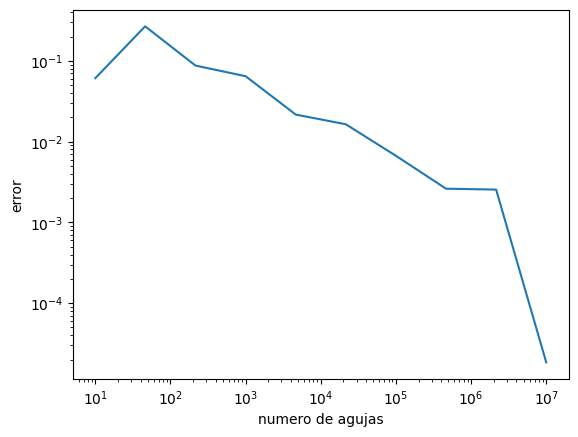

In [20]:
plt.plot(Ns,np.abs(error))
plt.xlabel('numero de agujas')
plt.ylabel('error')
plt.loglog()
plt.savefig('caminatas.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
pi=(N*2*l)/(contador*t)
pi

np.float64(3.1416507489695387)

 8. Remuestreo Bootstrap

Diseñe, implemente y verifique una funci´on, que estime la varianza de una V.A. a partir de una muestra de
datos. A continuaci´on, implemente una funci´on que utilize boostrap resampling para calcular los intervalos
de confidencia del estimador de la varianza con un nivel de significancia dado α.

Entonces, lo que me dice es que agarre la muestra y haga un remuestreo de reposicion, voy sacando y anotando los valores.
Primero quiero 

In [22]:

#Queremos una funcion que estime la varianza de una variable aleatoria a partir de una muestra de datos.
#Para esto definimos una funcion que calcule la media y la desviacion estandar de una distribucion conocida, puede ser la de distribucion normal.
n=1000 #numero de datos aleatoreos o tamaño de la muestra
mean= 0 #media de la muestra
sigma=1 #desviacion estandar
muestra=np.random.normal(loc=mean, scale=sigma, size=n) #Esta función genera una muestra aleatoria de números siguiendo una distribución normal.

In [23]:
#A continuacion definimos la funcion boostraop resampling

In [24]:
def bootstrap(x,func,m=1000): #m es el remuestreo x la muestra
    y=np.zeros(m)
    for i in range(m):
        a= np.random.choice(x,size=len(x), replace=True)
        y[i]=func(a)
    return y

In [25]:
bootstrap_medias = bootstrap(muestra, np.mean, m=10000)
bootstrap_varianzas = bootstrap(muestra, np.var, m=10000)


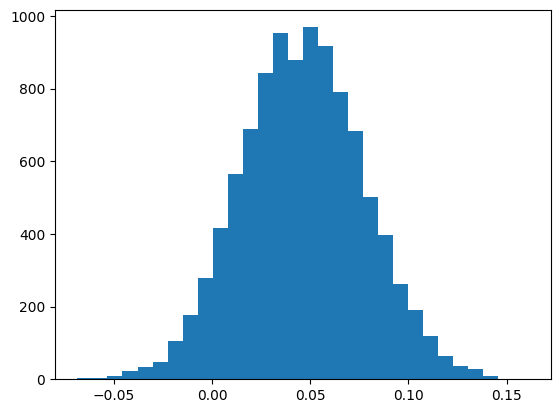

In [26]:
plt.hist(bootstrap_medias,bins=30)
plt.savefig('bootstrap_medias.pdf', dpi=300, bbox_inches='tight')

plt.show()

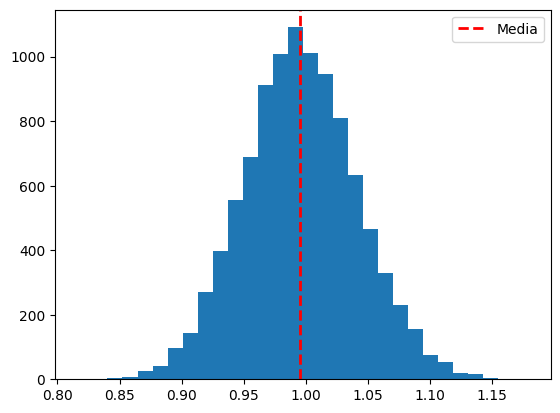

In [27]:
plt.hist(bootstrap_varianzas,bins=30)
plt.axvline(bootstrap_varianzas.mean(), color='r', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.savefig('boostrap_varianzas.pdf', dpi=300, bbox_inches='tight')

plt.show()


In [28]:
q=np.quantile(bootstrap_varianzas,[0.025,0.5,0.975])
print(q)

[0.90779527 0.99460083 1.08667123]


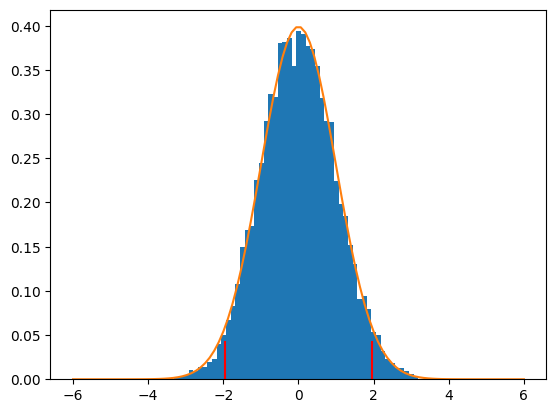

In [29]:
z=(bootstrap_medias-bootstrap_medias.mean())/(bootstrap_medias.std())
plt.hist(z,density=True,bins='auto')
x=np.linspace (-6.0,6.0,100)
y=sp.norm.pdf(x,loc=0.0,scale=1.0)
plt.plot(x,y,label='normal')

y1=sp.norm.ppf(0.025,loc=0.0,scale=1.0) #ppf es la funcion que devuelve los valores de t
plt.axvline(y1,0,0.1,color='red')
y1=sp.norm.ppf(0.975,loc=0.0,scale=1.0)
plt.axvline(y1,0,0.1,color='red')
plt.savefig('boostrap.pdf', dpi=300, bbox_inches='tight')

plt.show()



In [30]:
#pip install astropy
from astropy.stats import bootstrap

Metodo de chi-cuadrado.
La prueba Chi-cuadrado es una prueba de hipótesis utilizada para determinar si existe una relación entre dos variables categóricas. Es una técnica estadística utilizada para determinar si existe una discrepancia significativa entre una distribución observada y una distribución teórica.



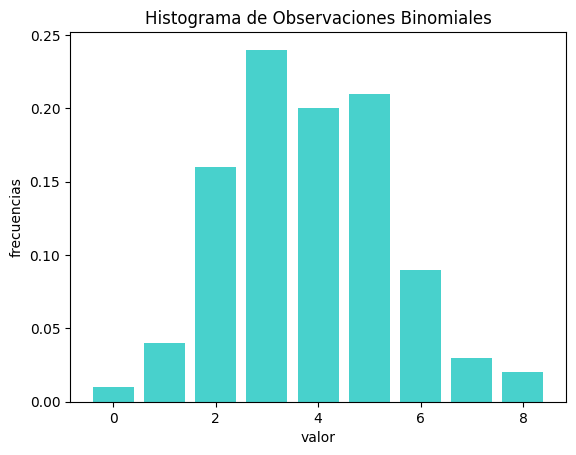

In [31]:
#Simulamos la distribucion binomial calculando la frecuencia.
n=10 #numero de experimentos
p=0.4 #la probabilidad de exito
observaciones=np.random.binomial(n=n, p=p, size=100) #simula las 100 observaciones de la variable aleatoria binomial.
valor,cuentas=np.unique(observaciones, return_counts=True)
frecuencias=cuentas/(np.sum(cuentas))
plt.bar(valor,frecuencias, facecolor='mediumturquoise')
plt.xlabel('valor')
plt.ylabel('frecuencias')
plt.title('Histograma de Observaciones Binomiales')
plt.savefig('histograma_de_observaciones_binomiales.pdf', dpi=300, bbox_inches='tight')

plt.show()



A continuacion queremos calcular el $\chi^2$ el cual se calcula como.


$\chi²=\sum \frac{(\omicron_i - E_i)²}{E_i}$ 

donde $\omicron_i$ son las frecuencias observadas absolutas y $E_i$ son las frecuencias esperadas absolutas bajo la distribucion binomial. 

La frecuencia esperada de k exitos es E(X=K)=N*P(X=K) donde N es el numero total de observaciones simuladas.

In [32]:
#Definimos el chi-cuadrado
def chi2(o,E):
    test=np.sum((o-E)**2/E)
    return(test)


El valor de chi-cuadrado es: 4.661847213674372


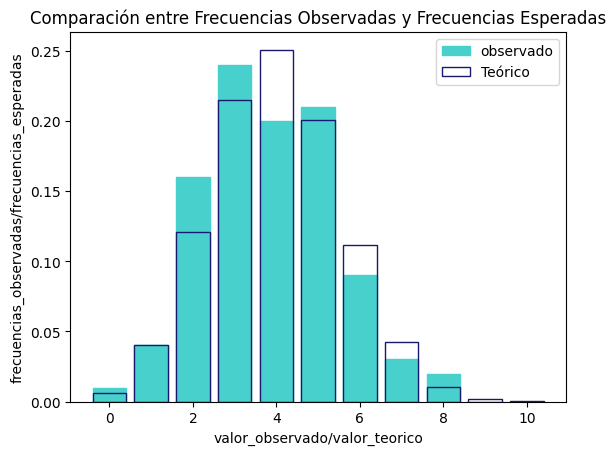

In [33]:
#Tenia el problema de que intentaba calcular el valor de chi-cuadrado utilizando cuentas y frecuencia esperada, el problema es que no tenian la misma cantidad de elementos
frecuencias_observadas_completas = np.zeros(n + 1) #Esto me crea un array de observaciones completo, completando con 0 donde no hubo observaciones
frecuencias_observadas_completas[valor] = cuentas #Con esto tanto cuantas como frecuencias esperadas tienen la misma cantidad de elementos.
#Calculo el chi-cuadrado a partir de los datos simulados y del modelo.
valores_teoricos = np.arange(0,n+1) #array que contenga todos los posibles resultados de la distribución binomial B(n,p)
N=100 #Numero de observaciones simuladas
frecuencia_esperada= N* sp.binom.pmf(valores_teoricos,n,p) #Al multiplicar por el tamaño de la muestra, se obtienen las frecuencias esperadas absolutas
# Si calculo, a continuacion y finalmente, el valor de chi-cuadrado
chi2_valor = chi2(frecuencias_observadas_completas, frecuencia_esperada)
print('El valor de chi-cuadrado es:', chi2_valor)
#Grafiquemos y comparemos las frecuencias obtenidas.
plt.bar(valor, frecuencias, edgecolor='mediumturquoise', facecolor='mediumturquoise', label='observado')#Ploteamos en un grafico de barras los observados.
plt.bar(valores_teoricos, frecuencia_esperada / 100, facecolor='none', edgecolor='midnightblue', label='Teórico') #divido por 100 devido que la frecuencia esperada a partir de 100 observaciones estan normalizada, ademas ambos graficos, deben compararse en la misma escala.
plt.xlabel('valor_observado/valor_teorico')
plt.ylabel('frecuencias_observadas/frecuencias_esperadas')
plt.legend()
plt.title('Comparación entre Frecuencias Observadas y Frecuencias Esperadas')
plt.savefig('Comparacion_frecuencias_observadas_esperadas.pdf', dpi=300, bbox_inches='tight')
plt.show()



A continuación, realizamos una prueba de hipótesis completa para comparar si los datos son acordes al modelo. En principio, debemos definir la hipótesis.

- Hipótesis nula (H0): Las frecuencias observadas siguen el modelo de una distribución binomial B(n=10,p=0.4).
- Hipótesis alternativa (H1): Las frecuencias observadas no siguen el modelo binomial.

Tenemos que establecer el nivel de significancia $\alpha=0.05$ para realizar la prueba.

- Las regiones de aceptacion son las que cumplen que: $\chi²<\chi_0$ ------>  {$RR={Z\leq-Z_\alpha}$}. No puedo rechazar H0
- Las regiones de rechazo son las que cumplen que: $\chi²>\chi_0$ ------>  {$RR={Z\geq-Z_\alpha}$}. Rechazo H0
Se calculan los grados de libertad $\nu=(k-1)-1$ donde k es el número de categorías. Usamos la distribución chi-cuadrado con 9 grados de libertad para determinar si el valor del estadístico es suficientemente grande como para rechazar la hipótesis nula.  
Ademas, $IC=1-\alpha=0.95$.
Luego, buscando en la tabla de distribucion de $\chi²$, teniendo en cuenta el numero de grados de libertad y el intervalo de confianza, obtenemos que el valor critico de prueba es $\chi²_{1-\alpha;\nu}=16,919$ lo que es claramente mayor al valor obtenido anteriormente. Por lo que, se acepta la hipotesis nula y la distribucion empirica creada sigue la distribucion binomial teorica.
A continuacion, calculamos el valor 'p' de prueba, el cual matematicamente se puede expresar del siguiente modo:

    p-valor=P($\chi²<\chi²_{obs}$)==$1-F(\chi²_{obs})$
    
Donde $\chi²$ es la variable aleatorea que siguen una distribucion chi-cuadrado, $\chi²_{obs}$ es el valor estadistico chi-cuadrado calculado,P es la función de probabilidad asociada con la distribución chi-cuadrado,F es la función de distribución acumulada (CDF).
A su vez, podemos utilizar el valor-p para hacer una prueba de hipotesis.

- Si el valor-p es menor que el nivel de significancia ($\alpha=0.05$), rechazamos la hipótesis nula. Esto sugiere que los datos no están en acuerdo con el modelo binomial.
- Si el valor-p es mayor que 0.05, no rechazamos la hipótesis nula, lo que significa que no hay evidencia suficiente para concluir que los datos no siguen el modelo binomial.

In [34]:
#Primero calculamos los grados de libertad
gl=len(valores_teoricos)-1-1
print(gl)

9


In [35]:

valor_p = 1 - sp.chi2.cdf(chi2_valor, gl)
print('El valor-p es:',valor_p)

# Prueba de hipotesis con el valor-p
alpha = 0.05  # Nivel de significancia
if valor_p < alpha:
    print("Rechazamos la hipótesis nula: las frecuencias observadasno siguen el modelo binomial.")
else:
    print("No se rechaza la hipótesis nula: las frecuencias observadas están en acuerdo con el modelo binomial.")



El valor-p es: 0.8627339912582709
No se rechaza la hipótesis nula: las frecuencias observadas están en acuerdo con el modelo binomial.


A continuacion, simulamos 100 muestras de una V.A $N(\mu,\sigma)$ con $\sigma=2.5$ y $\mu$ que varie entre 2 y 7. Estudiaremos el valor-p determinando si en algun valor de $\mu$ se 'puede confundir' el modelo.

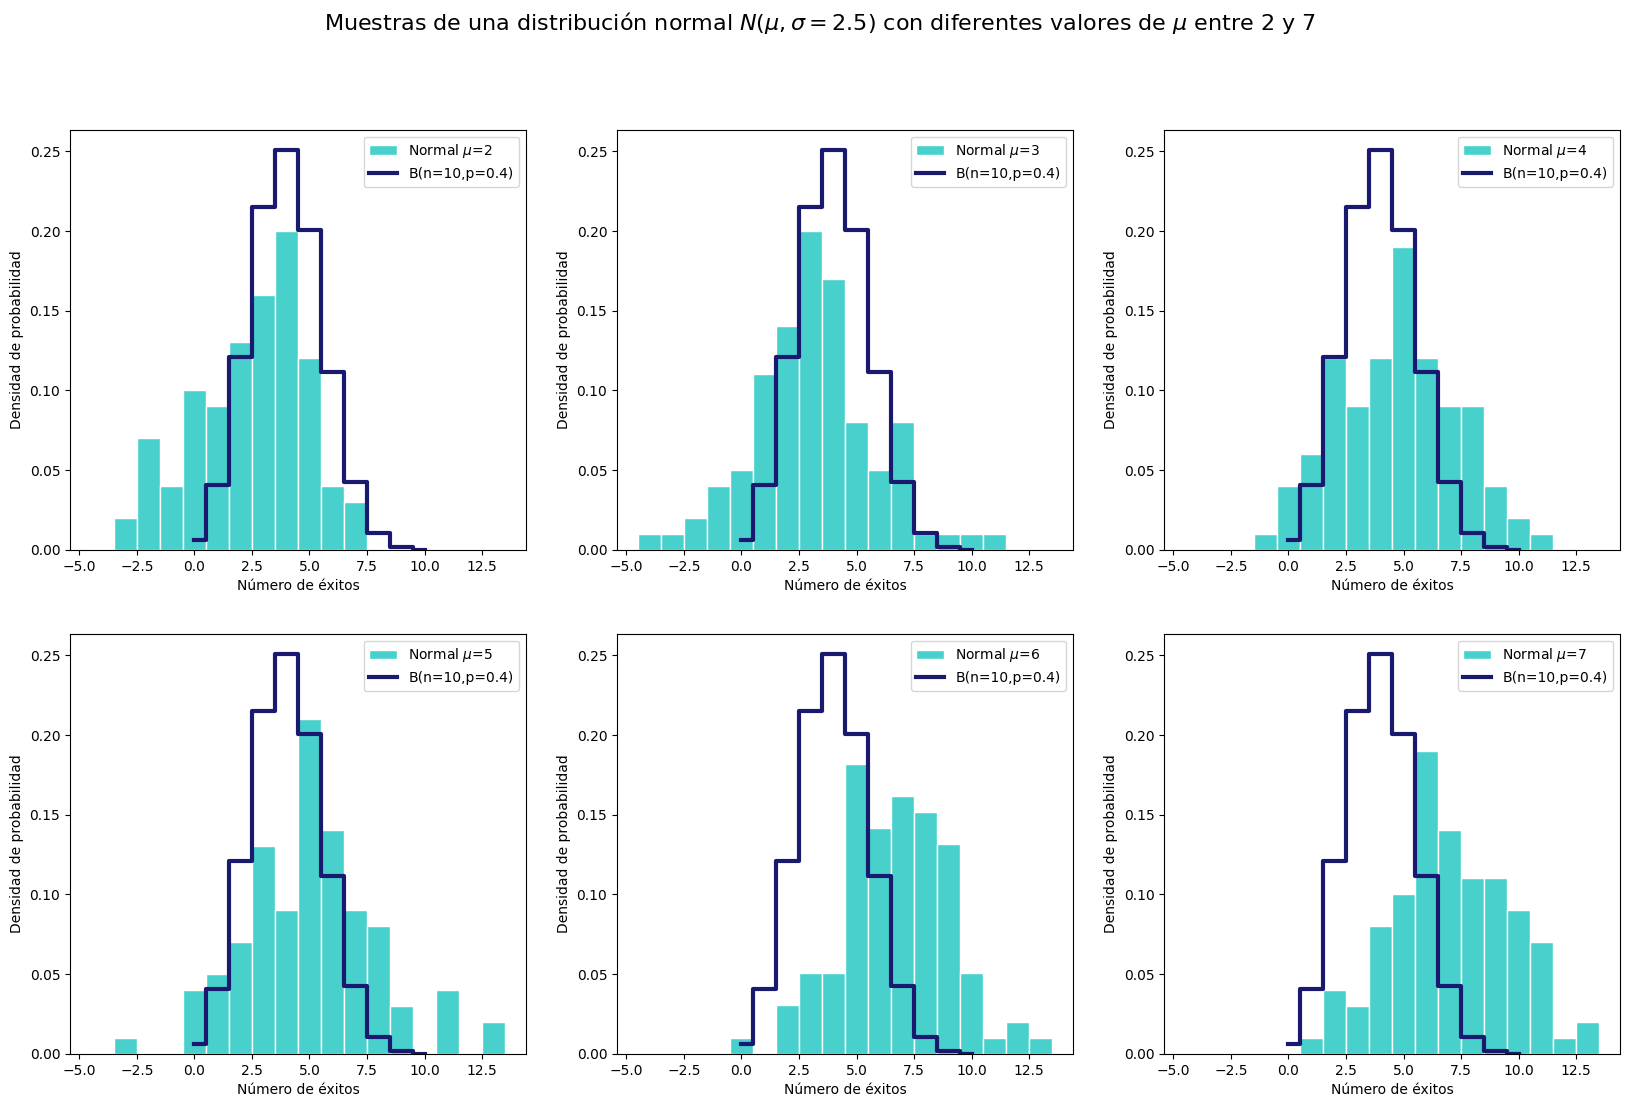

In [36]:
#Simulamos 100 observaciones de la distribucion normal N(mu,sigma)
n = 10  # número de experimentos en la binomial
p = 0.4  # probabilidad de éxito en la binomial
sigma = 2.5  # desviación estándar de la normal
mu_values = [2, 3, 4, 5, 6, 7]  #Lista de diferentes medias μ para las muestras normales a simular.
N = 100  # Tamaño de cada muestra, es decir, el número de observaciones
df = n  # Grados de libertad, que en este caso son nn categorías menos 1 (para el cálculo de chi-cuadrado)

# Función para generar muestras normales
def muestra_normal(mean, sigma=2.5, n=100):
    return np.random.normal(loc=mean, scale=sigma, size=n)

d = []  #  Lista vacía para almacenar las frecuencias observadas en los histogramas.
plt.figure(figsize=(20, 12)) #Establece el tamaño de la figura para mostrar gráficos

for i, mu in enumerate(mu_values, start=1):#se itera sobre los valores de μ en mu_values para simular muestras normales y generar los histogramas correspondientes.
    plt.subplot(2, 3, i)
    

    muestra = muestra_normal(mu) #genera una muestra aleatoria de una distribución normal con media μ y desviación estándar σ=2.5
    
    # Generamos el histograma de la muestra normal.
    histograma, bins = np.histogram(muestra, bins=np.arange(-4.5, 14.5, 1), density=True) #genera las frecuencias observadas de la muestra en diferentes rangos definidos por bins. Luego, se visualiza con plt.hist().
    plt.hist(muestra, bins=np.arange(-4.5, 14.5, 1), color='mediumturquoise', edgecolor='white', density=True, label=f'Normal $\\mu$={mu}')
    
    y = sp.binom.pmf(np.arange(11), n, p)  # calcula la función de probabilidad de la distribución binomial teórica con parámetros n y p.
    plt.step(np.arange(11), y, where='mid', lw=3, c='midnightblue', label=f"B(n={n},p={p:.1f})") #Grafica la distribución binomial teórica.
    plt.xlabel('Número de éxitos')  # Nombre del eje X
    plt.ylabel('Densidad de probabilidad')  # Nombre del eje Y
    plt.legend(loc='best')
    d.append(histograma)   # Almacena las frecuencias observadas para cálculo del chi-cuadrado
plt.suptitle('Muestras de una distribución normal $N(\\mu, \\sigma=2.5)$ con diferentes valores de $\\mu$ entre 2 y 7', fontsize=16)
plt.savefig('histogramas_100muestras.pdf', dpi=300, bbox_inches='tight')

plt.show()


In [37]:
#Calculamos los valores de chi-cuadrado para lo que queriamos.
for l in range(len(mu_values)):
    chi2 = 0
    for i in range(11):  # Cálculo del estadístico chi-cuadrado para 11 categorías
        # chi2 = Σ((observado - esperado)^2 / esperado)
        chi2 += ((d[l][i] - y[i])**2) / y[i]
    
    # Calculamos el valor p
    f = sp.chi2.cdf(chi2, df=10)  # Grados de libertad = 10
    p = 1 - f  # Valor p

    print(f'El chi2 de la distribución normal con media = {mu_values[l]} es: {chi2:.4f} y el p es: {p:.4f}')


El chi2 de la distribución normal con media = 2 es: 28.1342 y el p es: 0.0017
El chi2 de la distribución normal con media = 3 es: 31.0907 y el p es: 0.0006
El chi2 de la distribución normal con media = 4 es: 161.4819 y el p es: 0.0000
El chi2 de la distribución normal con media = 5 es: 215.7044 y el p es: 0.0000
El chi2 de la distribución normal con media = 6 es: 212.1127 y el p es: 0.0000
El chi2 de la distribución normal con media = 7 es: 351.3731 y el p es: 0.0000
